# COSC 437 Data Mining Lab Assignment 4 - Neural Networks for Regression and Classification

## Lab Overview
In this lab, you will build predictive models using neural networks with `sklearn.neural_network`. You will solve two problems: one regression task (predicting house prices) and one classification task (classifying breast cancer).

## Problem 1: Regression with Neural Networks
### Data Information
Use the **California Housing Prices** dataset from `sklearn.datasets`. 

Data Set Characteristics:
- Number of Instances:
    - 20640
- Number of Attributes:
    - 8 numeric, predictive attributes and the target
- Attribute Information:
    - MedInc: median income in block group
    - HouseAge: median house age in block group
    - AveRooms: average number of rooms per household
    - AveBedrms: average number of bedrooms per household
    - Population: block group population
    - AveOccup: average number of household members
    - Latitude: block group latitude
    - Longitude: block group longitude
- Missing Attribute Values:
    - None

This dataset was obtained from the StatLib repository. https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

### Tasks
#### Part I - Data Preparation
1. Load the dataset. You can acquire the data with the function `fetch_california_housing()` (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html)
2. Split into training (80%) and test (20%) sets.
3. Normalize features using `StandardScaler`.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [2]:
# load the dataset
data = fetch_california_housing()
X = data.data
y = data.target

In [3]:
from sklearn.model_selection import train_test_split
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler
# normalize with standard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#### Part II - Models Training
Train a linear regression model using all attributes. 

Train a neural network regressor (MLPRegressor). Use `hidden_layer_sizes=(64, 32)`, `max_iter=500`, and `early_stopping=True`.


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

# linear regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# neural network regressor
mlp_reg = MLPRegressor()
mlp_reg.fit(X_train, y_train)

MLPRegressor()

#### Part III - Evaluation
Use both the linear regression model and the neural network model, predict on the test set. For both model models, calculate:
- Mean Squared Error (MSE)
- $R^2$ Score

Compare the test set performance of the two models, which one performs better? Why do you think one model is performing better than the other? (Hint: think about the characteristics of the data)

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

# make predictions with both models
y_pred_linear = linear_reg.predict(X_test)
y_pred_mlp = mlp_reg.predict(X_test)

print(f"Linear prediction: {y_pred_linear}")
print(f"MLP prediction: {y_pred_mlp}")

Linear prediction: [0.70298353 1.75471768 2.72096393 ... 4.59369185 1.23349985 1.99958305]
MLP prediction: [ 0.46665034  2.4828733  12.71960058 ...  5.47166841  2.14994506
  1.69853071]


In [9]:
# mean squared error
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

In [11]:
print(f"Linear Regression - MSE: {mse_linear:.2f}, R^2 Score: {r2_linear:.2f}")
print(f"Neural Network - MSE: {mse_mlp:.2f}, R^2 Score: {r2_mlp:.2f}")

Linear Regression - MSE: 0.54, R^2 Score: 0.59
Neural Network - MSE: 6.75, R^2 Score: -4.15


## Problem 2: Classification with Neural Networks
### Data Information
Use the **Breast Cancer Wisconsin** dataset from `sklearn.datasets`.

Data Set Characteristics:
- Number of Instances:
    - 569
- Number of Attributes:
    - 30 numeric

| Variable Name   | Role    | Type        |
| --------------- | ------- | ----------- |
| ID              | ID      | Categorical |
| Diagnosis       | Target  | Categorical |
| radius1         | Feature | Continuous  |
| texture1        | Feature | Continuous  |
| perimeter1      | Feature | Continuous  |
| ...     | ...   | ...      |
| symmetry3          | Feature | Continuous | 
| fractal_dimension3 | Feature | Continuous | 

Target: Classify tumors as malignant (0) or benign (1).

The copy of UCI ML Breast Cancer Wisconsin (Diagnostic) dataset is downloaded from: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

###  Tasks
#### Part I - Data Preparation
1. Load the dataset. You can acquire the dataset using the function `load_breast_cancer()`. (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html)
2. Split into training (80%) and test (20%) sets with stratification.
3. Normalize features using `MinMaxScaler`.

In [12]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler

In [13]:
# load dataset
breast_cancer_data = load_breast_cancer()
X_bc = breast_cancer_data.data
y_bc = breast_cancer_data.target

In [14]:
# split
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.2, stratify=y_bc, random_state=42)

In [15]:
# normalize with minmaxscaler
scaler_bc = MinMaxScaler()
X_train_bc = scaler_bc.fit_transform(X_train_bc)
X_test_bc = scaler_bc.transform(X_test_bc)

#### Part II - Model Training
Train a neural network classifier (`MLPClassifier`). Use `hidden_layer_sizes=(32, 16)`, `max_iter=300`, and `activation='relu'`.

In [17]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=300, activation='relu', random_state=42)
mlp_clf.fit(X_train_bc, y_train_bc)

C:\Users\Jacob\anaconda3\envs\data_mining\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=300, random_state=42)

#### Part III - Evaluation
Predict on the test set and calculate:
- Accuracy
- Precision
- Recall
- F1-Score
- Confusion Matrix

Visualize ROC and calculate AUC.

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [25]:
y_pred_bc = mlp_clf.predict(X_test_bc)
accuracy = accuracy_score(y_test_bc, y_pred_bc)
precision = precision_score(y_test_bc, y_pred_bc)
recall = recall_score(y_test_bc, y_pred_bc)
f1 = f1_score(y_test_bc, y_pred_bc)
conf_matrix = confusion_matrix(y_test_bc, y_pred_bc)

In [26]:
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.9737
Precision: 0.9859
Recall: 0.9722
F1-Score: 0.9790
Confusion Matrix:
[[41  1]
 [ 2 70]]


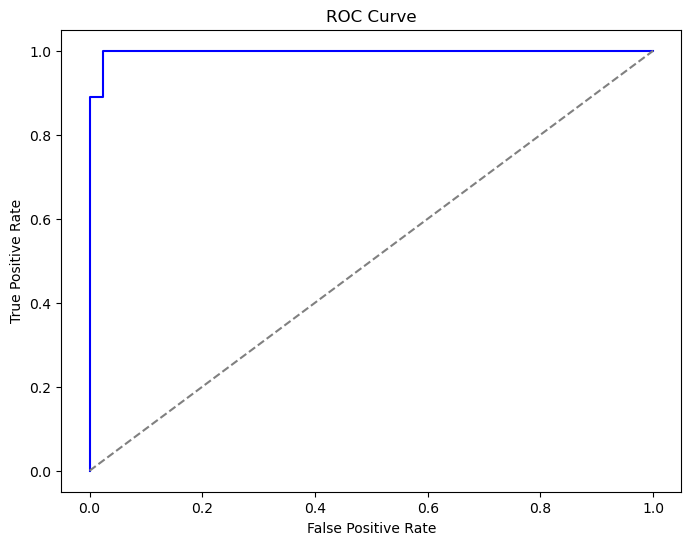

AUC: 0.9974


In [28]:
# ROC Curve and AUC
y_pred_proba = mlp_clf.predict_proba(X_test_bc)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_bc, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print AUC
print(f'AUC: {roc_auc:.4f}')

This dataset is not imbalanced. Should we still consider using a threshold that's different from the default? Explain your choice. 

In [29]:
# It could still be useful to adjust the threshhold. This is because we may want to adjust things like precision or recall by lowering threshold (increased recall) or raising threshold (increased precision)
# Adjusting the threshold would also be useful for calibrating the model. As can be seen by the graph above, the model seems to be 'overly confident' and gives probablities extremely close to 1. adjusting the threshold might make the predictions more accurate or rather further encompassing.

## Submit Your Assignment
To print your assignment, first select Cell -> Run All. Then choose File -> Download as -> HTML. You should submit both the Jupyter Notebook file and theprinted HTML file.

## Acknowledgements
- California Housing Dataset: `sklearn.datasets.fetch_california_housing`
- Breast Cancer Wisconsin Dataset: `sklearn.datasets.load_breast_cancer`